Text(0.5, 1.0, 'Zebra')

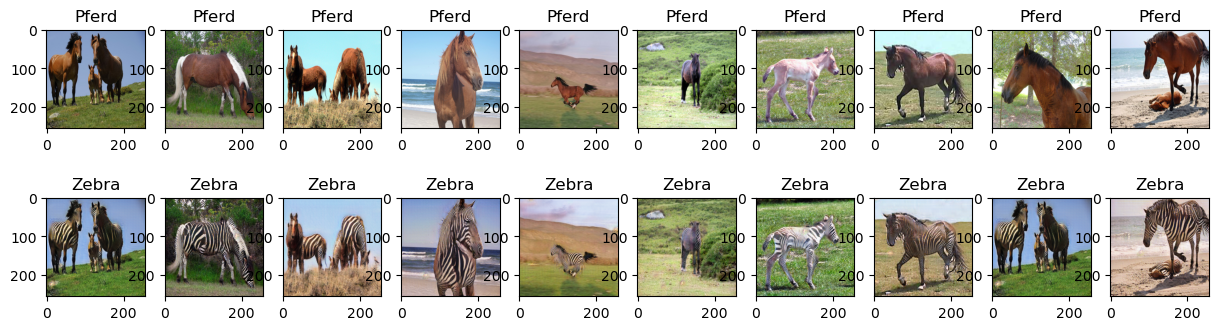

In [4]:
from PIL import Image
from torchvision import transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#############################################################################################
class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out

class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)
#############################################################################################

netG = ResNetGenerator()

model_path = '../MachineLearningAnnaFahn/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

netG.eval()

preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

img = Image.open("horse.jpg")
img1 = Image.open("horse1.jpg")
img2 = Image.open("horse2.jpg")
img3 = Image.open("horse3.jpg")
img4 = Image.open("horse4.jpg")
img5 = Image.open("horse5.jpg")
img6 = Image.open("horse6.jpg")
img7 = Image.open("horse7.jpg")
img8 = Image.open("horse8.jpg")
img9 = Image.open("horse9.jpg")
image_datas = [img,img1,img2,img3,img4,img5,img6,img7,img8,img9]

img_t = preprocess(img); img_t1 = preprocess(img1); img_t2 = preprocess(img2); img_t3 = preprocess(img3); img_t4 = preprocess(img4); img_t5 = preprocess(img5); img_t6 = preprocess(img6); img_t7 = preprocess(img7); img_t8 = preprocess(img); img_t9 = preprocess(img9); 
batch_t = torch.unsqueeze(img_t, 0); batch_t1 = torch.unsqueeze(img_t1, 0); batch_t2 = torch.unsqueeze(img_t2, 0); batch_t3 = torch.unsqueeze(img_t3, 0); batch_t4 = torch.unsqueeze(img_t4, 0); batch_t5 = torch.unsqueeze(img_t5, 0); batch_t6 = torch.unsqueeze(img_t6, 0); batch_t7 = torch.unsqueeze(img_t7, 0); batch_t8 = torch.unsqueeze(img_t8, 0); batch_t9 = torch.unsqueeze(img_t9, 0); 

batch_out = netG(batch_t); batch_out1 = netG(batch_t1); batch_out2 = netG(batch_t2); batch_out3 = netG(batch_t3); batch_out4 = netG(batch_t4); batch_out5 = netG(batch_t5); batch_out6 = netG(batch_t6); batch_out7 = netG(batch_t7); batch_out8 = netG(batch_t8); batch_out9 = netG(batch_t9); 

out_t = (batch_out.data.squeeze() + 1.0) / 2.0; out_t1 = (batch_out1.data.squeeze() + 1.0) / 2.0; out_t2 = (batch_out2.data.squeeze() + 1.0) / 2.0; out_t3 = (batch_out3.data.squeeze() + 1.0) / 2.0; out_t4 = (batch_out4.data.squeeze() + 1.0) / 2.0; out_t5 = (batch_out5.data.squeeze() + 1.0) / 2.0; out_t6 = (batch_out6.data.squeeze() + 1.0) / 2.0;  out_t7 = (batch_out7.data.squeeze() + 1.0) / 2.0; out_t8 = (batch_out8.data.squeeze() + 1.0) / 2.0;  out_t9 = (batch_out9.data.squeeze() + 1.0) / 2.0; 
out_img = transforms.ToPILImage()(out_t); out_img1 = transforms.ToPILImage()(out_t1); out_img2 = transforms.ToPILImage()(out_t2); out_img3 = transforms.ToPILImage()(out_t3); out_img4 = transforms.ToPILImage()(out_t4); out_img5 = transforms.ToPILImage()(out_t5); out_img6 = transforms.ToPILImage()(out_t6); out_img7 = transforms.ToPILImage()(out_t7); out_img8 = transforms.ToPILImage()(out_t8); out_img9 = transforms.ToPILImage()(out_t9); 
out_image_data = [out_img,out_img1,out_img2,out_img3,out_img4,out_img5,out_img6,out_img7,out_img8,out_img9]

f, ax = plt.subplots(2,10)
f.set_figheight(4) 
f.set_figwidth(15)
ax[0,0].imshow(image_datas[0]); ax[0,0].set_title('Pferd')
ax[1,0].imshow(out_image_data[0]); ax[1,0].set_title('Zebra') 
ax[0,1].imshow(image_datas[1]); ax[0,1].set_title('Pferd') 
ax[1,1].imshow(out_image_data[1]); ax[1,1].set_title('Zebra')

ax[0,2].imshow(image_datas[2]); ax[0,2].set_title('Pferd') 
ax[1,2].imshow(out_image_data[2]); ax[1,2].set_title('Zebra') 
ax[0,3].imshow(image_datas[3]); ax[0,3].set_title('Pferd') 
ax[1,3].imshow(out_image_data[3]); ax[1,3].set_title('Zebra') 

ax[0,4].imshow(image_datas[4]); ax[0,4].set_title('Pferd') 
ax[1,4].imshow(out_image_data[4]); ax[1,4].set_title('Zebra') 
ax[0,5].imshow(image_datas[5]); ax[0,5].set_title('Pferd')
ax[1,5].imshow(out_image_data[5]); ax[1,5].set_title('Zebra') 

ax[0,6].imshow(image_datas[6]); ax[0,6].set_title('Pferd') 
ax[1,6].imshow(out_image_data[6]); ax[1,6].set_title('Zebra') 
ax[0,7].imshow(image_datas[7]); ax[0,7].set_title('Pferd') 
ax[1,7].imshow(out_image_data[7]); ax[1,7].set_title('Zebra') 

ax[0,8].imshow(image_datas[8]); ax[0,8].set_title('Pferd') 
ax[1,8].imshow(out_image_data[8]); ax[1,8].set_title('Zebra') 
ax[0,9].imshow(image_datas[9]); ax[0,9].set_title('Pferd') 
ax[1,9].imshow(out_image_data[9]); ax[1,9].set_title('Zebra') 
